# **ECON 441B: Week 10 Assignment**
Courtney Manhart

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week 9/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [14]:
## Fitting a PCA Algorithm
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X_scaled)


array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

In [12]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.4595174 , 0.17181626])

# 2.) Plot a Scatter plot of the PCs on the axis

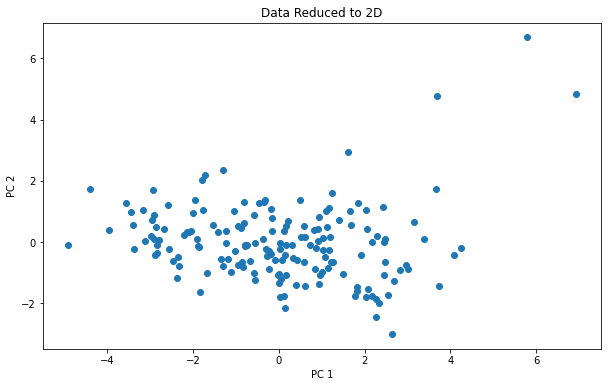

In [44]:
## Building Scatterplot
plt.figure(figsize = (10, 6))

plt.scatter(X_pca[:, 0], X_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data Reduced to 2D')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [23]:
# Finding the Weights of the 2 components 
loadings = pca.components_
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [19]:
# Gathering Feature names
feature_names = df.columns[1:]

In [27]:
## Calculating Feature Importance 
feature_importance = pd.DataFrame(np.sum(loadings **2, axis = 0), 
                      index = feature_names, columns = ['Importance'])
feature_importance

,Importance
child_mort,0.213201
exports,0.456567
health,0.081843
imports,0.477420
income,0.159263
inflation,0.037386
life_expec,0.230937
total_fer,0.187094
gdpp,0.156288


In [30]:
feature_importance = feature_importance.sort_values('Importance', ascending=False)
ranks = list(range(1, 10))
feature_importance['Rank'] = ranks

feature_importance

,Importance,Rank
imports,0.477420,1
exports,0.456567,2
life_expec,0.230937,3
child_mort,0.213201,4
total_fer,0.187094,5
income,0.159263,6
gdpp,0.156288,7
health,0.081843,8
inflation,0.037386,9


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

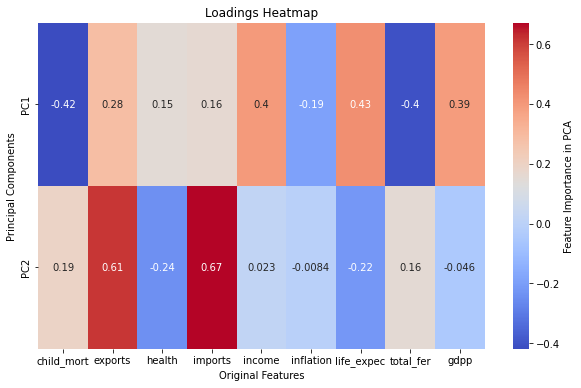

In [33]:
# Creating Heatmap
plt.figure(figsize = (10, 6))

sns.heatmap(loadings, annot = True, cmap='coolwarm',
            xticklabels= feature_names, 
            yticklabels=['PC1', 'PC2'], 
            cbar_kws={'label':'Feature Importance in PCA'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

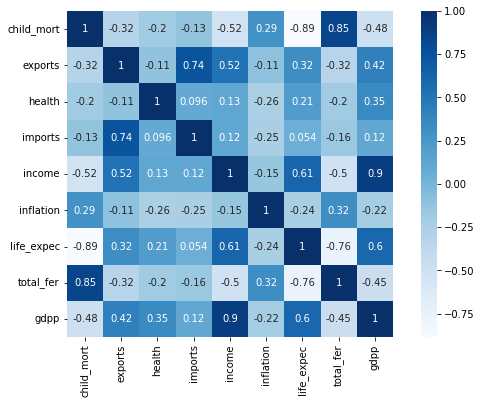

In [34]:
## Correlation Plot of Original Features 
plt.figure(figsize = (10, 6))

c = X.corr()
sns.heatmap(c, cmap = "Blues", annot = True, square = True)
plt.show()

**Notice Between Plots in 4 and 5**

Variables that are strongly correlated have a stronger feature importance in at least one of the PCs. For example, export and imports have the highest loadings in PC2 with a correlation of 0.74. Similarly, in PC1 GDP, income, and life_expectance have very high loading values in PC1 with high correlations between the variables. 

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [35]:
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_scaled)

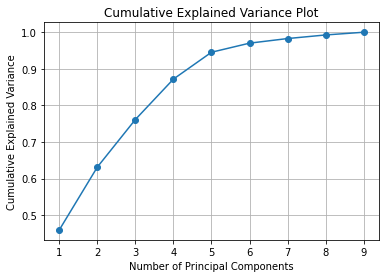

In [40]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), 
         cumulative_explained_variance, marker='o')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [43]:
cum_exp_var = pd.DataFrame(cumulative_explained_variance, 
                           index = list(range(1, 10)), 
                           columns = ['Cumulative Exp Var'])
cum_exp_var['Greater 95%'] = cumulative_explained_variance > 0.95

cum_exp_var

,Cumulative Exp Var,Greater 95%
1,0.459517,False
2,0.631334,False
3,0.761376,False
4,0.871908,False
5,0.945310,False
6,0.970152,True
7,0.982757,True
8,0.992569,True
9,1.000000,True


We would need 6 principle components to retain 95% of the variance.